In [85]:
import pandas as pd
import numpy as np
import pickle

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
sns.set()
d=open('subscribers','rb')
info4=pickle.load(d)
df=pd.DataFrame(info4)


227628

In [ ]:
df.dropna(inplace=True)


In [18]:
#data visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4552 entries, 208223 to 181569
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   subid                         4552 non-null   int64         
 1   package_type                  4552 non-null   object        
 2   num_weekly_services_utilized  4552 non-null   float64       
 3   preferred_genre               4552 non-null   object        
 4   intended_use                  4552 non-null   object        
 5   weekly_consumption_hour       4552 non-null   float64       
 6   num_ideal_streaming_services  4552 non-null   float64       
 7   retarget_TF                   4552 non-null   bool          
 8   age                           4552 non-null   float64       
 9   male_TF                       4552 non-null   object        
 10  country                       4552 non-null   object        
 11  attribution_technical  

In [19]:
df=df[df['paid_TF']==True]
df

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
208223,21511732,enhanced,2.320133,comedy,replace OTT,27.301448,1.849591,True,26.0,False,...,153.0,True,2019-11-26,False,3.2296,0.0367,ar,True,False,RAKBANK
290800,20668260,economy,4.217122,drama,access to exclusive content,21.501623,2.623452,False,49.0,False,...,23.0,True,2020-03-23,False,0.0000,0.1101,ar,True,True,RAKBANK
82478,21756190,enhanced,2.847400,comedy,access to exclusive content,30.201361,1.952255,False,27.0,True,...,16.0,True,2019-09-21,False,0.0000,0.0367,ar,True,True,Standard Charter
216803,24018804,enhanced,2.493926,comedy,replace OTT,27.301448,1.926469,False,24.0,False,...,154.0,True,2019-10-31,False,4.5875,0.0367,ar,True,False,RAKBANK
129542,20744390,economy,4.439518,drama,access to exclusive content,27.301448,2.656542,False,64.0,False,...,153.0,True,2019-09-28,False,4.5875,0.0000,ar,True,False,Paypal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206905,23236431,economy,2.511600,comedy,other,25.851492,1.836356,False,34.0,False,...,15.0,True,2020-02-08,False,0.0000,0.3303,ar,True,True,Paypal
131681,21358316,base,2.477725,comedy,replace OTT,27.301448,1.854015,False,24.0,False,...,18.0,True,2019-10-30,False,0.0000,0.0367,ar,True,True,Standard Charter
133320,25306093,base,2.361372,international,access to exclusive content,27.301448,1.867833,False,55.0,False,...,202.0,True,2019-10-21,False,3.9269,0.0367,ar,True,False,Paypal
126466,29015408,base,5.307007,comedy,supplement OTT,30.201361,3.203505,False,27.0,False,...,15.0,True,2020-02-21,False,0.0000,0.0367,ar,True,True,RAKBANK


In [20]:
#customer service dataframe
df.head(50)
df.describe(include=object)

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,language,payment_type
count,4552,4552,4552,4552,4552,4552,4552,4552,4552,4552,4552
unique,3,5,7,2,1,28,16,2,3,1,5
top,base,comedy,access to exclusive content,False,UAE,facebook,facebook,iOS,base_uae_14_day_trial,ar,Standard Charter
freq,2355,2685,1939,3778,4552,915,1648,2940,4536,4552,1737


<AxesSubplot:title={'center':'Package Preference'}>

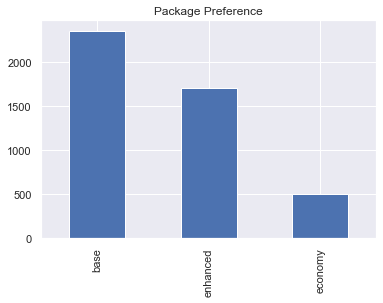

In [21]:
#engagement dataframe
df['package_type'].value_counts().plot(kind='bar',title='Package Preference')

<AxesSubplot:title={'center':'Genre Preference'}>

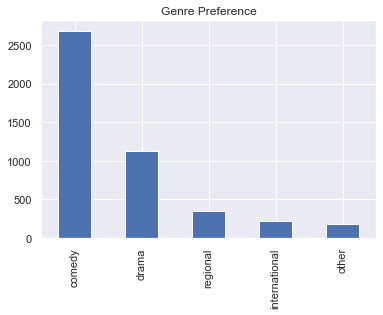

In [22]:
df['preferred_genre'].value_counts().plot(kind='bar',title='Genre Preference')

<AxesSubplot:title={'center':'Intended Uses'}>

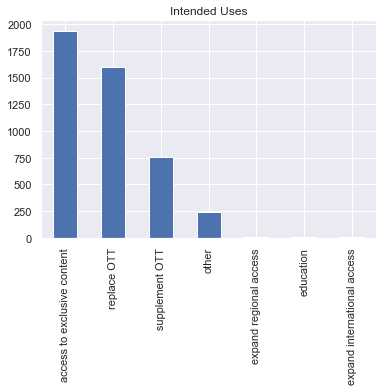

In [23]:
df['intended_use'].value_counts().plot(kind='bar',title='Intended Uses')

<AxesSubplot:title={'center':'Retargeting'}>

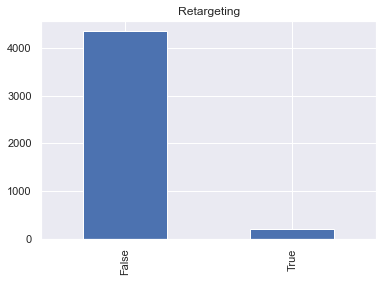

In [24]:
df['retarget_TF'].value_counts().plot(kind='bar',title='Retargeting')

In [25]:
#want the TRUE values below
df['retarget_TF'].value_counts()

False    4344
True      208
Name: retarget_TF, dtype: int64

In [26]:
df.drop(['attribution_technical','attribution_survey','op_sys','months_per_bill_period','monthly_price','discount_price','creation_until_cancel_days',
         'cancel_before_trial_end','cancel_before_trial_end','trial_end_date','initial_credit_card_declined','join_fee','paid_TF','refund_after_trial_TF','retarget_TF','revenue_net'],axis=1,inplace=True)


In [27]:
df

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,plan_type,account_creation_date,language,payment_type
208223,21511732,enhanced,2.320133,comedy,replace OTT,27.301448,1.849591,26.0,False,UAE,base_uae_14_day_trial,2019-11-11 03:19:28,ar,RAKBANK
290800,20668260,economy,4.217122,drama,access to exclusive content,21.501623,2.623452,49.0,False,UAE,base_uae_14_day_trial,2020-03-08 20:42:05,ar,RAKBANK
82478,21756190,enhanced,2.847400,comedy,access to exclusive content,30.201361,1.952255,27.0,True,UAE,base_uae_14_day_trial,2019-09-06 01:36:20,ar,Standard Charter
216803,24018804,enhanced,2.493926,comedy,replace OTT,27.301448,1.926469,24.0,False,UAE,base_uae_14_day_trial,2019-10-16 10:17:40,ar,RAKBANK
129542,20744390,economy,4.439518,drama,access to exclusive content,27.301448,2.656542,64.0,False,UAE,base_uae_14_day_trial,2019-09-13 04:48:39,ar,Paypal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206905,23236431,economy,2.511600,comedy,other,25.851492,1.836356,34.0,False,UAE,base_uae_14_day_trial,2020-01-24 18:24:55,ar,Paypal
131681,21358316,base,2.477725,comedy,replace OTT,27.301448,1.854015,24.0,False,UAE,base_uae_14_day_trial,2019-10-15 18:33:36,ar,Standard Charter
133320,25306093,base,2.361372,international,access to exclusive content,27.301448,1.867833,55.0,False,UAE,base_uae_14_day_trial,2019-10-06 03:19:46,ar,Paypal
126466,29015408,base,5.307007,comedy,supplement OTT,30.201361,3.203505,27.0,False,UAE,base_uae_14_day_trial,2020-02-06 11:08:41,ar,RAKBANK


In [28]:
df=pd.get_dummies(df)
df=df.sort_values(by=['account_creation_date'])
df

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,account_creation_date,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,...,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_uae_14_day_trial,language_ar,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter
40214,27172733,3.339323,31.651317,2.169862,63.0,2019-06-30 21:59:30,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
10533,22893425,3.907827,27.301448,2.519277,46.0,2019-07-01 21:56:09,0,0,1,0,...,1,0,1,0,1,1,0,0,0,0
81652,29150507,2.950497,21.501623,1.867285,42.0,2019-07-02 01:09:53,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
90410,23156786,2.921040,27.301448,2.024004,25.0,2019-07-02 04:35:16,1,0,0,1,...,1,0,1,0,1,0,0,1,0,0
74399,26579543,3.996200,24.401536,1.833671,38.0,2019-07-05 21:38:01,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237459,24216228,2.773761,28.751405,1.919681,42.0,2020-03-27 19:56:16,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
337205,25802739,3.053596,30.201361,1.945535,72.0,2020-03-27 21:01:14,0,0,1,1,...,1,0,1,0,1,0,0,1,0,0
212778,27511963,2.169906,20.051667,1.861483,57.0,2020-03-27 21:31:23,0,0,1,1,...,1,0,1,0,1,0,0,1,0,0
196976,29137986,3.639778,28.751405,2.433347,59.0,2020-03-27 22:42:16,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1


In [29]:
df['account_creation_date'] = pd.to_datetime(df['account_creation_date']).dt.date
df['account_creation_date'] = df['account_creation_date'].apply(lambda x: x.strftime('%m'))
      

In [30]:
df

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,account_creation_date,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,...,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_uae_14_day_trial,language_ar,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter
40214,27172733,3.339323,31.651317,2.169862,63.0,06,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
10533,22893425,3.907827,27.301448,2.519277,46.0,07,0,0,1,0,...,1,0,1,0,1,1,0,0,0,0
81652,29150507,2.950497,21.501623,1.867285,42.0,07,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
90410,23156786,2.921040,27.301448,2.024004,25.0,07,1,0,0,1,...,1,0,1,0,1,0,0,1,0,0
74399,26579543,3.996200,24.401536,1.833671,38.0,07,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237459,24216228,2.773761,28.751405,1.919681,42.0,03,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
337205,25802739,3.053596,30.201361,1.945535,72.0,03,0,0,1,1,...,1,0,1,0,1,0,0,1,0,0
212778,27511963,2.169906,20.051667,1.861483,57.0,03,0,0,1,1,...,1,0,1,0,1,0,0,1,0,0
196976,29137986,3.639778,28.751405,2.433347,59.0,03,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1


In [32]:
from sklearn import model_selection

df_train, df_test = model_selection.train_test_split(df, test_size=0.3)


In [33]:
x_train=df_train
x_train=x_train.drop('subid',axis=1)


x_test=df_test
x_test=x_test.drop('subid',axis=1)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 38118 to 131058
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num_weekly_services_utilized              3186 non-null   float64
 1   weekly_consumption_hour                   3186 non-null   float64
 2   num_ideal_streaming_services              3186 non-null   float64
 3   age                                       3186 non-null   float64
 4   account_creation_date                     3186 non-null   object 
 5   package_type_base                         3186 non-null   uint8  
 6   package_type_economy                      3186 non-null   uint8  
 7   package_type_enhanced                     3186 non-null   uint8  
 8   preferred_genre_comedy                    3186 non-null   uint8  
 9   preferred_genre_drama                     3186 non-null   uint8  
 10  preferred_genre_international 

In [34]:
from sklearn.preprocessing import StandardScaler as st
x_train_normalized=st().fit(x_train).transform(x_train)
x_train_df=pd.DataFrame(x_train_normalized,columns=x_train.columns)
x_train_df


,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,account_creation_date,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,...,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_uae_14_day_trial,language_ar,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter
0,0.494911,2.663599,-0.239857,-0.268659,0.165218,-1.036445,-0.346775,1.291643,0.842156,-0.576142,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,-0.772653,-0.445697,1.283035
1,-0.304824,0.380022,-0.563604,-0.191533,0.408352,-1.036445,-0.346775,1.291643,0.842156,-0.576142,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,-0.772653,2.243678,-0.779402
2,0.630078,0.380022,1.498742,-0.224587,0.165218,-1.036445,-0.346775,1.291643,-1.187428,-0.576142,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,1.294242,-0.445697,-0.779402
3,-1.453739,-1.618108,-0.591338,-0.323749,-1.293585,-1.036445,-0.346775,1.291643,-1.187428,1.735683,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,-0.772653,-0.445697,1.283035
4,-0.552632,-0.190872,-0.257536,-0.136443,0.651486,-1.036445,-0.346775,1.291643,-1.187428,1.735683,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,-0.772653,-0.445697,1.283035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,1.962970,-1.047214,2.038328,-0.334767,-1.536719,-1.036445,2.883711,-0.774208,0.842156,-0.576142,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,-0.772653,2.243678,-0.779402
3182,-0.447500,0.094575,-0.112919,-0.004226,0.894620,0.964836,-0.346775,-0.774208,0.842156,-0.576142,...,0.0,0.0,0.050173,-0.050173,0.0,4.186079,-0.171471,-0.772653,-0.445697,-0.779402
3183,0.160749,1.521811,-0.570129,0.105954,0.651486,-1.036445,2.883711,-0.774208,-1.187428,1.735683,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,-0.772653,2.243678,-0.779402
3184,1.099406,0.094575,1.626775,0.260206,0.894620,0.964836,-0.346775,-0.774208,-1.187428,-0.576142,...,0.0,0.0,0.050173,-0.050173,0.0,-0.238887,-0.171471,-0.772653,-0.445697,1.283035


In [35]:
x_test_normalized=st().fit(x_train).transform(x_test)
x_test_df=pd.DataFrame(x_test_normalized,columns=x_test.columns)
x_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num_weekly_services_utilized              1366 non-null   float64
 1   weekly_consumption_hour                   1366 non-null   float64
 2   num_ideal_streaming_services              1366 non-null   float64
 3   age                                       1366 non-null   float64
 4   account_creation_date                     1366 non-null   float64
 5   package_type_base                         1366 non-null   float64
 6   package_type_economy                      1366 non-null   float64
 7   package_type_enhanced                     1366 non-null   float64
 8   preferred_genre_comedy                    1366 non-null   float64
 9   preferred_genre_drama                     1366 non-null   float64
 10  preferred_genre_international       

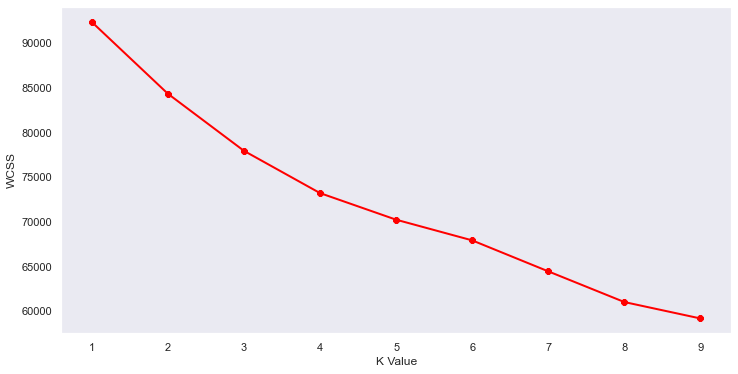

In [36]:

from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    clust=kmeans.fit_predict(x_train_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")
plt.show()
#k=4

In [62]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=0)
cluster_train=kmeans.fit_predict(x_train_df)
silhouette_avg = silhouette_score(x_train_df, cluster_train)
print('score for train_set:',silhouette_avg)
x_train_df['cluster']=cluster_train

# get centroids
centroids = kmeans.cluster_centers_




score for train_set: 0.12722751565783794


In [63]:
cluster_test=kmeans.predict(x_test_df)
silhouette_avg2 = silhouette_score(x_test_df, cluster_test)
print('score for test_set:',silhouette_avg2)



score for test_set: 0.12854237583533742


In [64]:
x_test_df['cluster']=cluster_test

In [65]:
df_train['cluster']=cluster_train
df_test['cluster']=cluster_test

<ipython-input-65-f9eebb854441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cluster']=cluster_train
<ipython-input-65-f9eebb854441>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cluster']=cluster_test


In [66]:
trainclustgroup=df_train.groupby(cluster_train)
testclustgroup=df_test.groupby(cluster_test)

In [67]:
#ignore cluster3
cluster0=trainclustgroup.get_group(0)
cluster1=trainclustgroup.get_group(1)
cluster2=trainclustgroup.get_group(2)
cluster3=trainclustgroup.get_group(3)


In [111]:
cluster2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 95602 to 104877
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   subid                                     1070 non-null   int64  
 1   num_weekly_services_utilized              1070 non-null   float64
 2   weekly_consumption_hour                   1070 non-null   float64
 3   num_ideal_streaming_services              1070 non-null   float64
 4   age                                       1070 non-null   float64
 5   account_creation_date                     1070 non-null   object 
 6   package_type_base                         1070 non-null   uint8  
 7   package_type_economy                      1070 non-null   uint8  
 8   package_type_enhanced                     1070 non-null   uint8  
 9   preferred_genre_comedy                    1070 non-null   uint8  
 10  preferred_genre_drama         

In [79]:
c0num_weekly_services_utilized=cluster0['num_weekly_services_utilized'].mean()
c1num_weekly_services_utilized=cluster1['num_weekly_services_utilized'].mean()
c2num_weekly_services_utilized=cluster2['num_weekly_services_utilized'].mean()
c3num_weekly_services_utilized=cluster3['num_weekly_services_utilized'].mean()

c0weekly_consumption_hour=cluster0['weekly_consumption_hour'].mean()
c1weekly_consumption_hour=cluster1['weekly_consumption_hour'].mean()
c2weekly_consumption_hour=cluster2['weekly_consumption_hour'].mean()
c3weekly_consumption_hour=cluster3['weekly_consumption_hour'].mean()

c0num_ideal_streaming_services=cluster0['num_ideal_streaming_services'].mean()
c1num_ideal_streaming_services=cluster1['num_ideal_streaming_services'].mean()
c2num_ideal_streaming_services=cluster2['num_ideal_streaming_services'].mean()
c3num_ideal_streaming_services=cluster3['num_ideal_streaming_services'].mean()

c0age=cluster0['age'].mean()
c1age=cluster1['age'].mean()
c2age=cluster2['age'].mean()
c3age=cluster3['age'].mean()

c0size=len(cluster0)
c1size=len(cluster1)
c2size=len(cluster2)
c3size=len(cluster3)


dic={'cluster':['cluster 0','cluster 1','cluster 2','cluster 3'],
         'num_weekly_services_utilized':[c0num_weekly_services_utilized,c1num_weekly_services_utilized,c2num_weekly_services_utilized,c3num_weekly_services_utilized],
         'weekly_consumption_hour':[c0weekly_consumption_hour,c1weekly_consumption_hour,c2weekly_consumption_hour,c3weekly_consumption_hour],
        'num_ideal_streaming_services':[c0num_ideal_streaming_services,c1num_ideal_streaming_services,c2num_ideal_streaming_services,c3num_ideal_streaming_services],
        'age':[c0age,c1age,c2age,c3age],
        'size of cluster':[c0size,c1size,c2size,c3size]}
itemdf=pd.DataFrame(dic)
itemdf


,cluster,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,size of cluster
0,cluster 0,3.577835,35.455063,2.007344,45.112994,531
1,cluster 1,2.792532,26.746483,1.960335,51.840288,1577
2,cluster 2,3.065373,26.961318,2.047799,47.933645,1070
3,cluster 3,3.112693,27.120204,2.098174,42.500000,8


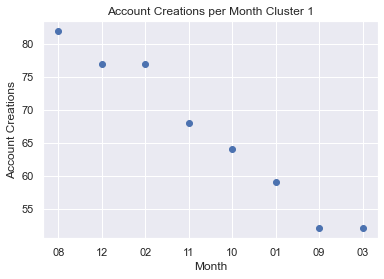

In [142]:
#cluster 0 account_creation_date
x=cluster0['account_creation_date'].value_counts().index
y=cluster0['account_creation_date'].value_counts()


plt.scatter(x,y)
plt.xlabel("Month")
plt.ylabel("Account Creations")
plt.title("Account Creations per Month Cluster 1")
plt.show()

In [140]:
cluster0['account_creation_date'].value_counts()

08    82
12    77
02    77
11    68
10    64
01    59
09    52
03    52
Name: account_creation_date, dtype: int64

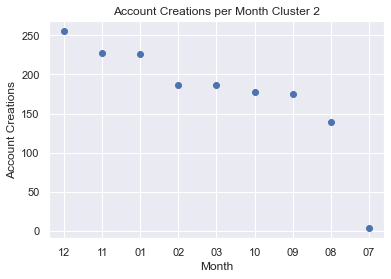

In [149]:
#cluster 2 account_creation_date
x=cluster1['account_creation_date'].value_counts().index
y=cluster1['account_creation_date'].value_counts()

plt.scatter(x,y)
plt.xlabel("Month")
plt.ylabel("Account Creations")
plt.title("Account Creations per Month Cluster 2")
plt.show()

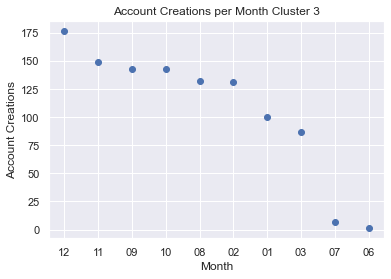

In [147]:
#cluster 2 account_creation_date
x2=cluster2['account_creation_date'].value_counts().index
y=cluster2['account_creation_date'].value_counts()

plt.scatter(x2,y)
plt.xlabel("Month")
plt.ylabel("Account Creations")
plt.title("Account Creations per Month Cluster 3")
plt.show()

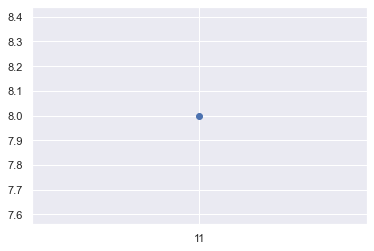

In [146]:
#cluster 3 account_creation_date
x3=cluster3['account_creation_date'].value_counts().index
y=cluster3['account_creation_date'].value_counts()

plt.scatter(x3,y)
plt.show()

In [ ]:
#value counts

In [80]:
cluster0['package_type_base'].value_counts()
cluster1['package_type_base'].value_counts()
cluster2['package_type_base'].value_counts()
cluster3['package_type_base'].value_counts()


0    277
1    254
Name: package_type_base, dtype: int64

In [112]:
#additional value counts
d1=cluster0['payment_type_CBD'].value_counts()
d2=cluster1['payment_type_CBD'].value_counts()
d3=cluster2['payment_type_CBD'].value_counts()
d4=cluster3['payment_type_CBD'].value_counts()

d5=cluster0['payment_type_Najim'].value_counts()
d6=cluster1['payment_type_Najim'].value_counts()
d7=cluster2['payment_type_Najim'].value_counts()
d8=cluster3['payment_type_Najim'].value_counts()

d9=cluster0['payment_type_Paypal'].value_counts()
d10=cluster1['payment_type_Paypal'].value_counts()
d11=cluster2['payment_type_Paypal'].value_counts()
d12=cluster3['payment_type_Paypal'].value_counts()

d13=cluster0['payment_type_RAKBANK'].value_counts()
d14=cluster1['payment_type_RAKBANK'].value_counts()
d15=cluster2['payment_type_RAKBANK'].value_counts()
d16=cluster3['payment_type_RAKBANK'].value_counts()

d17=cluster0['payment_type_Standard Charter'].value_counts()
d18=cluster1['payment_type_Standard Charter'].value_counts()
d19=cluster2['payment_type_Standard Charter'].value_counts()
d20=cluster3['payment_type_Standard Charter'].value_counts()

e9=cluster0['plan_type_base_eur_14_day_trial'].value_counts()
e10=cluster1['plan_type_base_eur_14_day_trial'].value_counts()
e11=cluster2['plan_type_base_eur_14_day_trial'].value_counts()
e12=cluster3['plan_type_base_eur_14_day_trial'].value_counts()

e13=cluster0['plan_type_base_uae_14_day_trial'].value_counts()
e14=cluster1['plan_type_base_uae_14_day_trial'].value_counts()
e15=cluster2['plan_type_base_uae_14_day_trial'].value_counts()
e16=cluster3['plan_type_base_uae_14_day_trial'].value_counts()

e17=cluster0['plan_type_high_uae_14_day_trial'].value_counts()
e18=cluster1['plan_type_high_uae_14_day_trial'].value_counts()
e19=cluster2['plan_type_high_uae_14_day_trial'].value_counts()
e20=cluster3['plan_type_high_uae_14_day_trial'].value_counts()


In [124]:
e19

0    1070
Name: plan_type_high_uae_14_day_trial, dtype: int64